**Introduction to Neural Networks**

Remember, the terms Neural Network (NN) and Artificial Neural Network (ANN) are often used interchangeably.  A neural network is a series of algorithms that attempt to recognize underlying relationships in a set of data by mimicking the way the human brain operates. Here is a breakdown of the components:

**Neurons:** Basic units that receive inputs, apply weights, and pass them through an activation function.

**Layers:**

1. **Input layer:** Takes in data.

2. **Hidden layers:** Where the computation happens.

3. **Output layer:** Produces the final prediction.

**Weights:** Values that are adjusted during training to minimize the error between the predicted and actual output.

**Activation Function:** Introduces non-linearity to the model. Examples include Sigmoid, ReLU, Tanh.

**Gradient Descent:** Optimization technique used to minimize the loss function by adjusting weights.

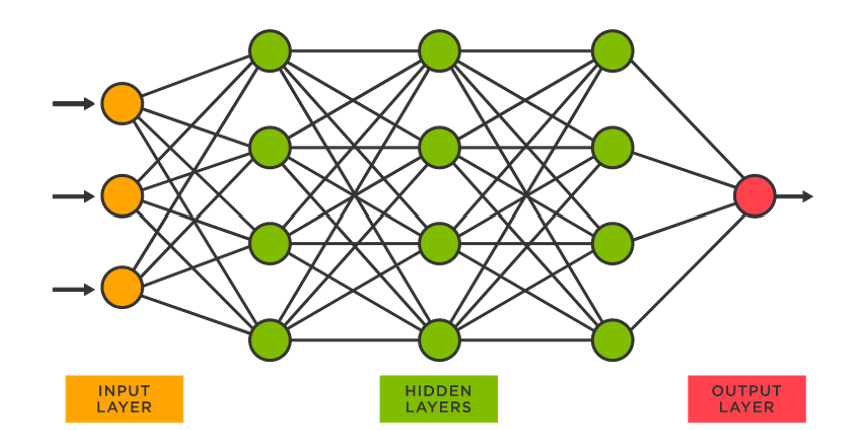

**Figure:** Neural Network (Picture Courtesy: Online Resource)

**Step 1: Install TensorFlow**

Install TensorFlow:

In [18]:
!pip install tensorflow

**Step 2: Load Dataset**

**Dataset Description:** The **Modified National Institute of Standards and Technology (MNIST)** dataset is a collection of 70,000 grayscale images of handwritten digits (0-9), each 28x28 pixels. It's widely used for training and testing machine learning models, especially in image classification tasks, serving as a benchmark for algorithms in computer vision.

We shall use the MNIST dataset (a dataset of handwritten digits) for classification.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to 1D vector (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)   # '-1' adjusts the number of rows so that the total number of elements remains the same.  If x_train originally has 60,000 images and each image is 28x28 (784 pixels), reshaping it to -1, 784 will automatically create 60,000 rows, each with 784 columns (flattened pixels).
x_test = x_test.reshape(-1, 28 * 28)     # '-1' adjusts the number of rows so that the total number of elements remains the same.  If x_test originally has 10,000 images and each image is 28x28 (784 pixels), reshaping it to -1, 784 will automatically create 60,000 rows, each with 784 columns (flattened pixels).

**Step 3: Build Neural Network Model**

Let us use a simple feedforward neural network.

**Note:**
1. **Adam Optimizer:** The **Adam optimizer** (short for Adaptive Moment Estimation) is an advanced gradient descent method. It computes adaptive learning rates for each parameter by combining momentum (past gradients) and scaling by the squared gradients. This makes Adam efficient and well-suited for large datasets and noisy problems, improving convergence speed.

2. **Sparse Categorical Cross Entropy:** **Sparse Categorical Cross-Entropy** is a loss function used for multi-class classification problems where labels are provided as integers instead of one-hot encoded vectors. It calculates the difference between the predicted probability distribution and the true class label, penalizing incorrect predictions. It’s efficient for large label sets.

3. **Softmax Activation Function:** The **Softmax activation function** converts a vector of raw scores (logits) into probabilities, with each value in the vector representing the probability of a class. It normalizes the output to a range between 0 and 1, ensuring that the sum of all probabilities equals 1, making it ideal for classification.

**Example:**
Suppose we have the following logits (raw output values from a neural network):
logits = [2.0, 1.0, 0.1]


Let us the exponential of each logit.

$e^{2.0}$ ≈ 7.389, $e^{1.0}$ ≈ 2.718, $e^{0.1}$ ≈ 1.105.

Now, add the exponentiated values to normalize them.


7.389 + 2.718 + 1.105 ≈ 11.212

Let us divide each exponentiated value by the sum to get the probabilities.
Divide each exponentiated value by the sum to get the probabilities.

$P_1$ = 7.389 / 11.212 ≈ 0.659, $P_2$ = 2.718 / 11.212 ≈ 0.242, $P_3$ = 1.105 / 11.212 ≈ 0.098.  

Therefore, Softmax Probabilities = [0.659, 0.242, 0.098].

These probabilities represent the likelihood of each class, where the first class has the highest probability, followed by the second, and the third class has the lowest probability. The overall summation will be 1.

4. **ReLU:** The **Rectified Linear Unit (ReLU)** activation function returns the input directly if positive, otherwise returns zero. It introduces non-linearity to the model, making it widely used in neural networks. It helps avoid the vanishing gradient problem.

**Example:** For input [-2, 3, -1, 5], ReLU output is [0, 3, 0, 5].

ReLU avoids the vanishing gradient problem by maintaining a constant gradient of **1** for positive input values. Unlike sigmoid or tanh, which suffer from vanishing gradients for large inputs, ReLU ensures that gradients remain non-zero for positive values, allowing deeper networks to learn more effectively during backpropagation.

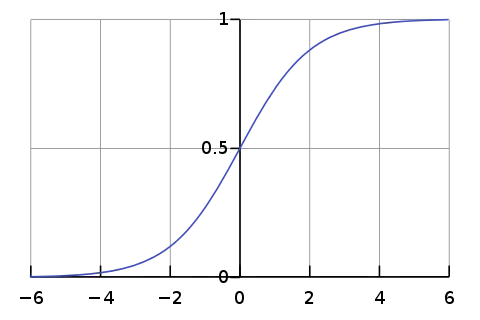

**Figure:** Softmax Function (Picture Courtesy: Online Resource)

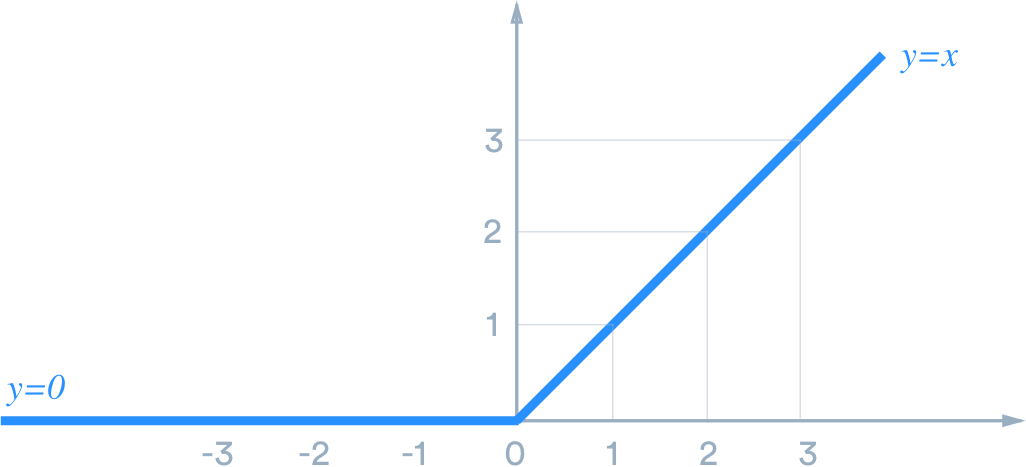

**Figure:** ReLU Activation Function (Picture Courtesy: Online Resource)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),    #It creates a dense layer with 128 neurons, each using the ReLU activation function, and it expects an input of shape (784,) — a 1D vector of 784 values (flattened from a 28x28 image). The output of this layer will be passed to the next layer in the neural network.
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes for MNIST digits
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Step 4: Train the Model**

Train the neural network on the MNIST data.

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8750 - loss: 0.4290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9643 - loss: 0.1212
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0789
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9822 - loss: 0.0581
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0456


**Step 5: Evaluate the Model**

Evaluate the model on the test set.

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9734 - loss: 0.0931
Test accuracy: 0.9767000079154968


Here, we are getting the test accuracy 97.67% (approximately).